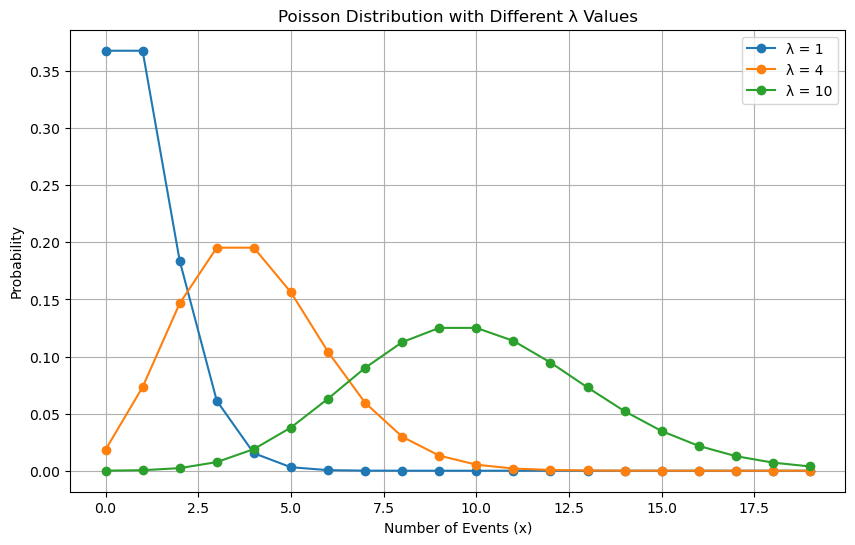

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the range for x (number of events) and different lambda values
x = np.arange(0, 20)
lambda_values = [1, 4, 10]

# Create a plot for Poisson distributions with different lambda values
plt.figure(figsize=(10, 6))

for lam in lambda_values:
    poisson_pmf = poisson.pmf(x, lam)
    plt.plot(x, poisson_pmf, marker="o", linestyle="-", label=f"λ = {lam}")

plt.title("Poisson Distribution with Different λ Values")
plt.xlabel("Number of Events (x)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

# Generating Synthetic Data

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
days = np.arange(1, 101)  # 100 days
is_weekend = np.random.choice([0, 1], size=100, p=[0.7, 0.3])
notification_type = np.random.choice([0, 1], size=100, p=[0.6, 0.4])
user_base = np.random.randint(10000, 20000, size=100)
clicks = np.random.poisson(
    lam=200
    + 50 * is_weekend
    + 100 * notification_type
    + np.random.normal(scale=20, size=100)
)
weekdays = np.random.choice(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    size=100,
)

data_notifications = pd.DataFrame(
    {
        "Day": days,
        "Is_Weekend": is_weekend,
        "Notification_Type": notification_type,
        "Clicks": clicks,
        "User_Base": user_base,
        "Weekday": weekdays,
    }
)
data_notifications.head()

,Day,Is_Weekend,Notification_Type,Clicks,User_Base,Weekday
0,1,0,0,251,11648,Tuesday
1,2,1,1,320,15539,Saturday
2,3,1,0,280,19637,Wednesday
3,4,0,0,218,14199,Wednesday
4,5,0,1,296,18445,Sunday


In [65]:
data_notifications

,Day,Is_Weekend,Notification_Type,Clicks,User_Base,Weekday
0,1,0,0,251,11648,Tuesday
1,2,1,1,320,15539,Saturday
2,3,1,0,280,19637,Wednesday
3,4,0,0,218,14199,Wednesday
4,5,0,1,296,18445,Sunday
...,...,...,...,...,...,...
95,96,0,0,200,11841,Thursday
96,97,0,1,313,18716,Friday
97,98,0,1,305,16971,Saturday
98,99,0,1,315,15625,Tuesday


In [66]:
data_notifications.describe()

,Day,Is_Weekend,Notification_Type,Clicks,User_Base
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.300000,0.410000,259.930000,14627.380000
std,29.011492,0.460566,0.494311,57.655587,2836.333594
min,1.000000,0.000000,0.000000,153.000000,10098.000000
25%,25.750000,0.000000,0.000000,212.500000,12203.750000
50%,50.500000,0.000000,0.000000,261.500000,14525.500000
75%,75.250000,1.000000,1.000000,305.500000,17068.000000
max,100.000000,1.000000,1.000000,396.000000,19719.000000


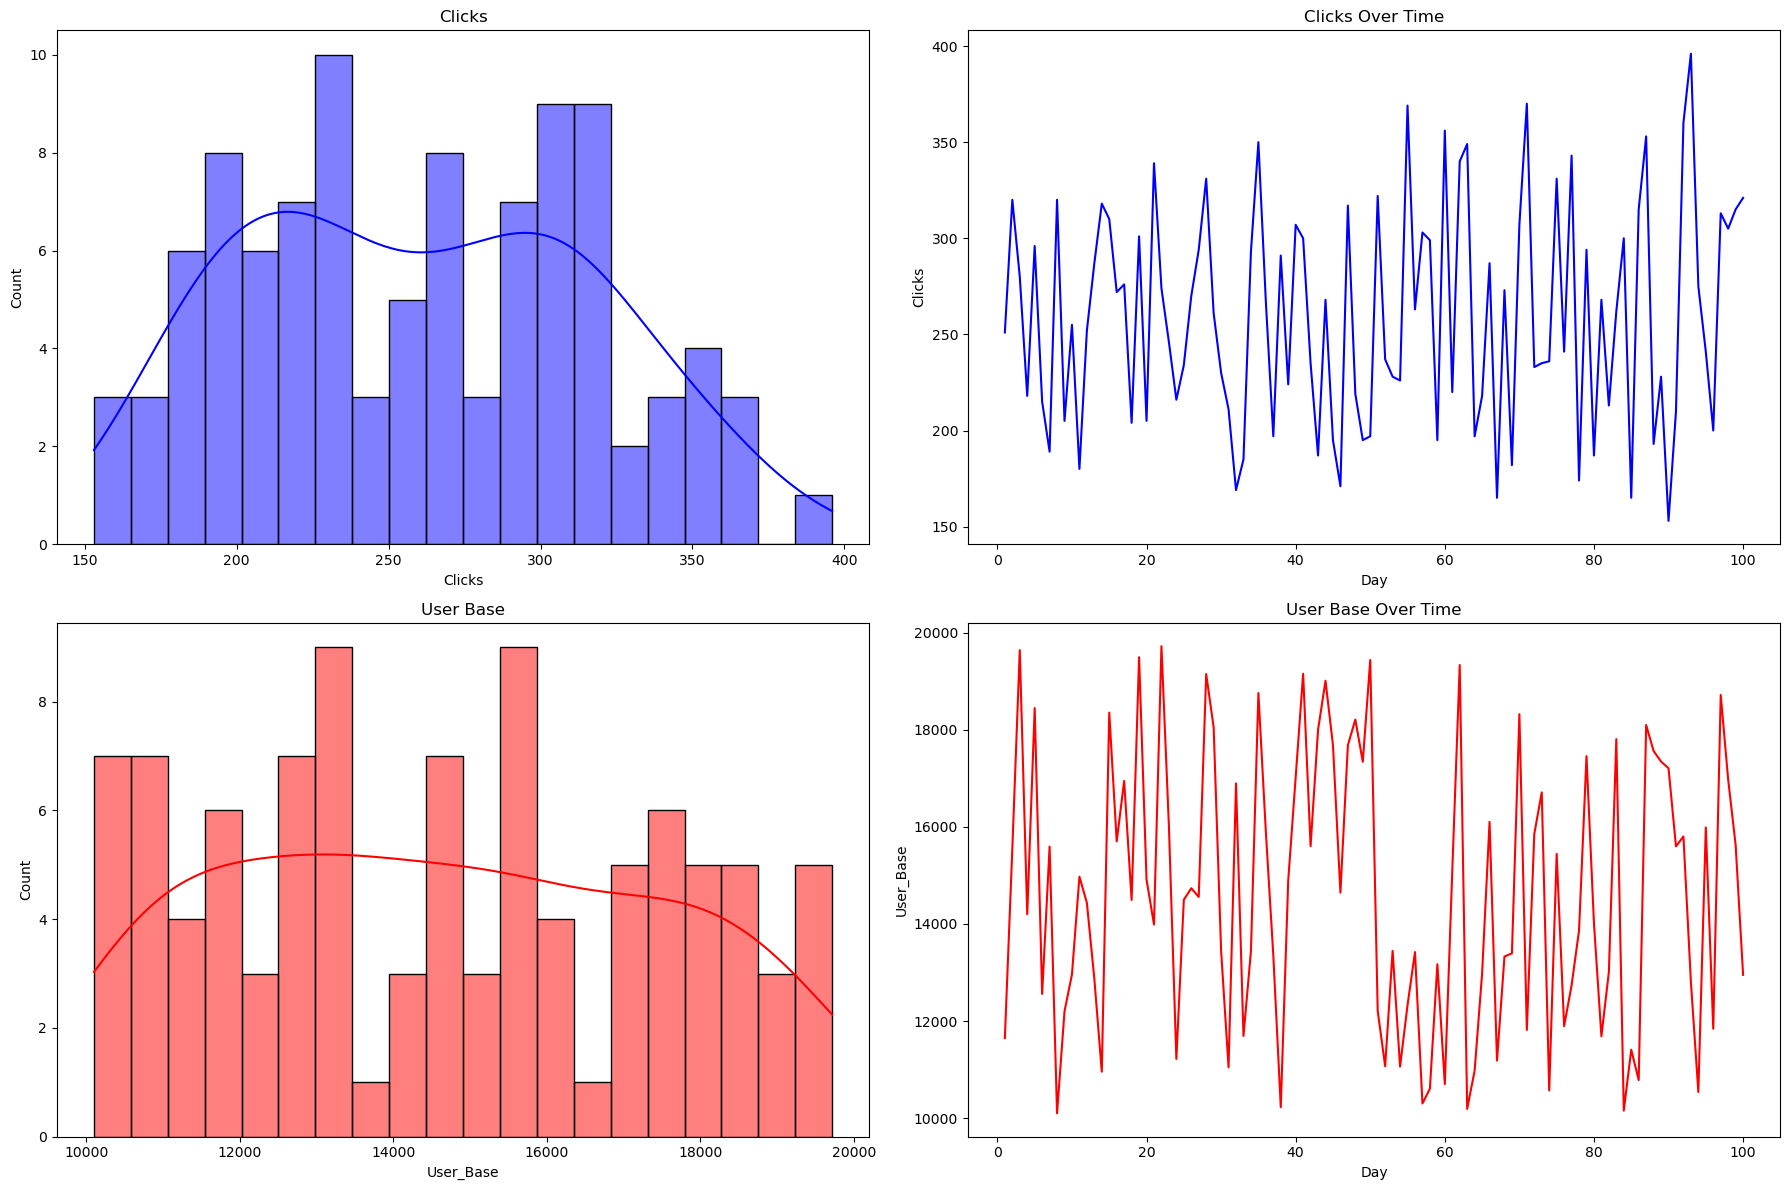

In [67]:
# Create subplots
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.histplot(
    data_notifications["Clicks"], kde=True, ax=axes[0, 0], color="blue", bins=20
)
axes[0, 0].set_title("Clicks")

# Time series plot of Clicks over Days
sns.lineplot(x="Day", y="Clicks", data=data_notifications, ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Clicks Over Time")

sns.histplot(
    data_notifications["User_Base"], kde=True, ax=axes[1, 0], color="red", bins=20
)
axes[1, 0].set_title("User Base")

# Time series plot of User Base over Days
sns.lineplot(
    x="Day", y="User_Base", data=data_notifications, ax=axes[1, 1], color="red"
)
axes[1, 1].set_title("User Base Over Time")


# sns.countplot(
#     x="Notification_Type", data=data_notifications, ax=axes[1, 1], palette="deep"
# )
# axes[1, 1].set_title("Notification Type")

# sns.countplot(x="Weekday", data=data_notifications, ax=axes[1, 2], palette="muted")
# axes[1, 2].set_title("Weekday")

plt.tight_layout()
plt.show()

# Model Fitting

In [68]:
# Fit the Poisson regression model
model = smf.glm(
    formula="Clicks ~ Is_Weekend + Notification_Type + User_Base",
    data=data_notifications,
    family=sm.families.Poisson(),
).fit()

# Print the summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.59
Date:                Sun, 14 Jul 2024   Deviance:                       257.78
Time:                        21:00:29   Pearson chi2:                     258.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.3009      0.03